In [1]:
box_volume = (29.6016*29.3088*150) #A^3
n_e_water = 6000*1*8+6000*2*1 #electrons
n_e_barium = 11*56 #electrons
n_e_chlorine = 22*17 #electrons
bulk_e_dens_electrolyte = (n_e_water+n_e_barium+n_e_chlorine)/box_volume #electrons/A^3
print(bulk_e_dens_electrolyte)
#bulk_e_dens_electrolyte = 0.33

0.4686559672807173


In [2]:
box_volume = (29.6016*29.3088*150) #A^3
n_e_water = 6000*1*8+6000*2*1 #electrons
bulk_e_dens_water = (n_e_water)/box_volume #electrons/A^3
print(bulk_e_dens_water)

0.46104866431944647


In [3]:
box_volume = (29.6016*29.3088*150) #A^3
n_e_barium = 11*56 #electrons
bulk_e_dens_barium = (n_e_barium)/box_volume #electrons/A^3
print(bulk_e_dens_barium)

0.00473343295367965


In [4]:
box_volume = (29.6016*29.3088*150) #A^3
n_e_chlorine = 22*17 #electrons
bulk_e_dens_chlorine = (n_e_chlorine)/box_volume #electrons/A^3
print(bulk_e_dens_chlorine)

0.002873870007591216


<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


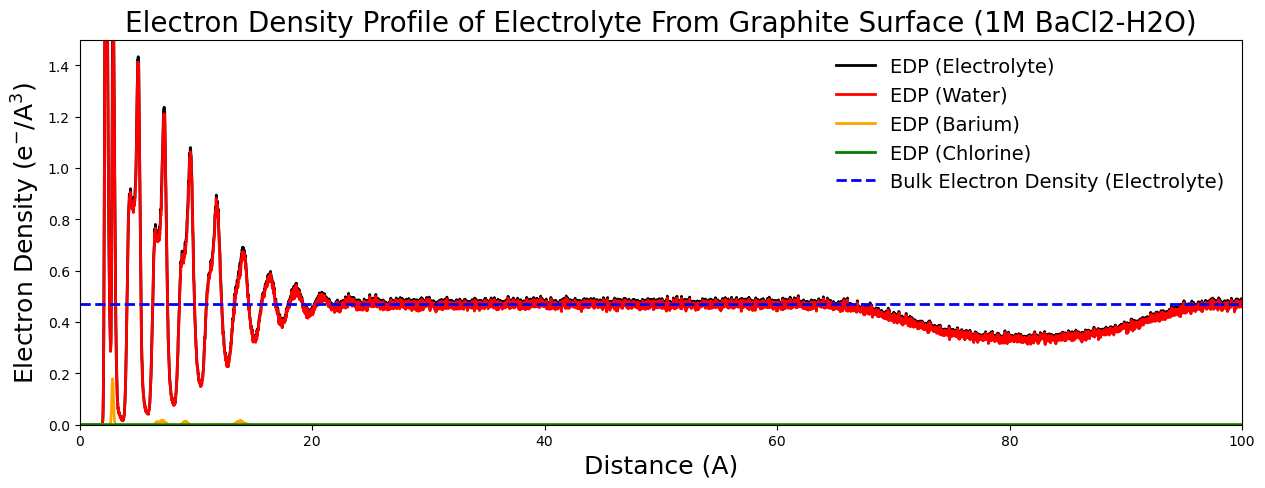

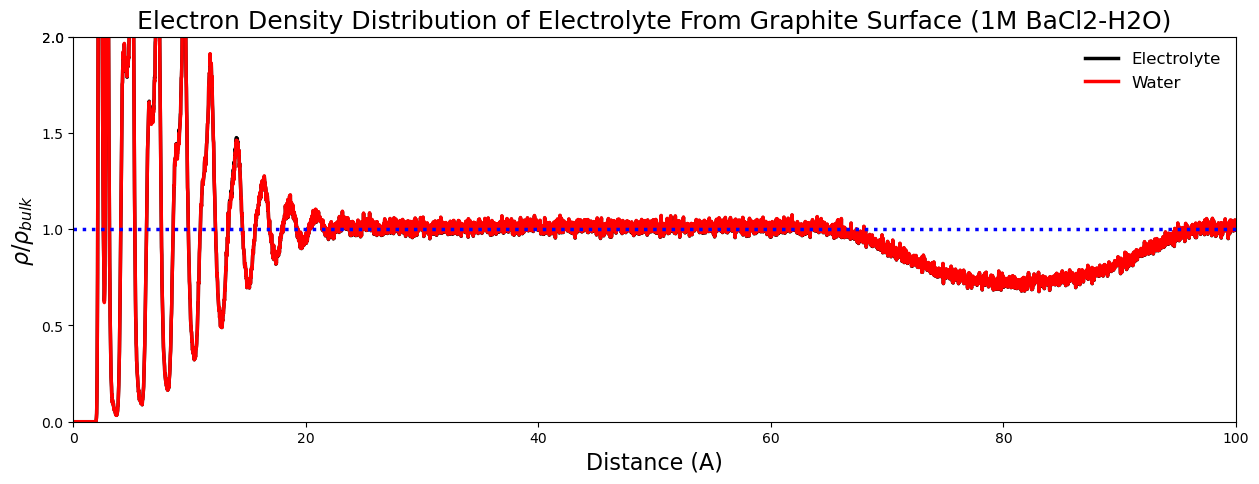

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
import numpy as np
import pandas as pd

r_sp_electrolyte, gr_sp_electrolyte = np.loadtxt("rdf-surf_grp_electrolyte_nopbc.xvg", comments=["@","#"], unpack=True)
r_sp_water, gr_sp_water = np.loadtxt("rdf-surf_grp_water_nopbc.xvg", comments=["@","#"], unpack=True)
r_sp_barium, gr_sp_barium = np.loadtxt("rdf-surf_grp_barium_nopbc.xvg", comments=["@","#"], unpack=True)
r_sp_chlorine, gr_sp_chlorine = np.loadtxt("rdf-surf_grp_chlorine_nopbc.xvg", comments=["@","#"], unpack=True)

r_sp_electrolyte = r_sp_electrolyte*10 #Angstrom
r_sp_water = r_sp_water*10 #Angstrom
r_sp_barium = r_sp_barium*10 #Angstrom
r_sp_chlorine = r_sp_chlorine*10 #Angstrom

gr_sp_arr_electrolyte = np.array(gr_sp_electrolyte)
gr_sp_arr_electrolyte_trim = np.trim_zeros(gr_sp_arr_electrolyte)
gr_sp_arr_electrolyte_trim_sum = np.sum(gr_sp_arr_electrolyte_trim)
gr_sp_arr_electrolyte_trim_avg = gr_sp_arr_electrolyte_trim_sum/gr_sp_arr_electrolyte_trim.size
scaling_factor_electrolyte = gr_sp_arr_electrolyte_trim_avg/bulk_e_dens_electrolyte
e_dens_sp_electrolyte = gr_sp_arr_electrolyte/scaling_factor_electrolyte

gr_sp_arr_water = np.array(gr_sp_water)
gr_sp_arr_water_trim = np.trim_zeros(gr_sp_arr_water)
gr_sp_arr_water_trim_sum = np.sum(gr_sp_arr_water_trim)
gr_sp_arr_water_trim_avg = gr_sp_arr_water_trim_sum/gr_sp_arr_water_trim.size
scaling_factor_water = gr_sp_arr_water_trim_avg/bulk_e_dens_water
e_dens_sp_water = gr_sp_arr_water/scaling_factor_water

gr_sp_arr_barium = np.array(gr_sp_barium)
gr_sp_arr_barium_trim = np.trim_zeros(gr_sp_arr_barium)
gr_sp_arr_barium_trim_sum = np.sum(gr_sp_arr_barium_trim)
gr_sp_arr_barium_trim_avg = gr_sp_arr_barium_trim_sum/gr_sp_arr_barium_trim.size
scaling_factor_barium = gr_sp_arr_barium_trim_avg/bulk_e_dens_barium
e_dens_sp_barium = gr_sp_arr_barium/scaling_factor_barium

gr_sp_arr_chlorine = np.array(gr_sp_chlorine)
gr_sp_arr_chlorine_trim = np.trim_zeros(gr_sp_arr_chlorine)
gr_sp_arr_chlorine_trim_sum = np.sum(gr_sp_arr_chlorine_trim)
gr_sp_arr_chlorine_trim_avg = gr_sp_arr_chlorine_trim_sum/gr_sp_arr_chlorine_trim.size
scaling_factor_chlorine = gr_sp_arr_chlorine_trim_avg/bulk_e_dens_chlorine
e_dens_sp_chlorine = gr_sp_arr_chlorine/scaling_factor_chlorine

plt.figure(figsize = (15, 5))
plt.plot(r_sp_electrolyte[:7500],e_dens_sp_electrolyte[:7500], linewidth=2, label = "EDP (Electrolyte)", color = "black")
plt.plot(r_sp_water[:7500],e_dens_sp_water[:7500], linewidth=2, label = "EDP (Water)", color = "red")
plt.plot(r_sp_barium[:7500],e_dens_sp_barium[:7500], linewidth=2, label = "EDP (Barium)", color = "orange")
plt.plot(r_sp_chlorine[:7500],e_dens_sp_chlorine[:7500], linewidth=2, label = "EDP (Chlorine)", color = "green")
plt.axhline(y = bulk_e_dens_electrolyte, color='blue', linestyle='--', linewidth=2, label = "Bulk Electron Density (Electrolyte)")
plt.xlim([0,100])
plt.ylim([0,1.5])
#plt.yticks([0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6])
plt.legend(fontsize = 14, frameon=False)
plt.xlabel('Distance (A)',fontsize = 18)
plt.ylabel('Electron Density (e$^{-}$/A$^{3}$)',fontsize = 18)
plt.title('Electron Density Profile of Electrolyte From Graphite Surface (1M BaCl2-H2O)',fontsize = 20)
plt.savefig("electron_density_electrolyte_bacl_0.1m_0.1epC.svg",bbox_inches='tight')
plt.show()

plt.figure(figsize = (15, 5))
plt.plot(r_sp_electrolyte[:7500],e_dens_sp_electrolyte[:7500]/bulk_e_dens_electrolyte, linewidth=2.5, label = "Electrolyte", color = "black")
plt.plot(r_sp_water[:7500],e_dens_sp_water[:7500]/bulk_e_dens_water, linewidth=2.5, label = "Water", color = "red")
#plt.plot(r_sp_barium[:7500],e_dens_sp_barium[:7500]/bulk_e_dens_barium, linewidth=2.5, label = "barium", color = "orange")
#plt.plot(r_sp_chlorine[:7500],e_dens_sp_chlorine[:7500]/bulk_e_dens_chlorine, linewidth=2.5, label = "Chlorine", color = "green")
plt.axhline(y = 1.0, color='blue', linestyle='dotted', linewidth=2.5)
plt.xlim([0,100])
plt.ylim([0,2])
plt.yticks([0,0.5,1,1.5,2,2])
plt.legend(fontsize = 12, loc = 'upper right', frameon=False)
plt.xlabel('Distance (A)',fontsize = 16)
plt.ylabel(r"$\rho$"+"/"+r"$\rho$$_{bulk}$",fontsize = 16)
plt.title('Electron Density Distribution of Electrolyte From Graphite Surface (1M BaCl2-H2O)',fontsize = 18)
plt.savefig("electron_density_electrolyte_ratio_bacl_0.1m_0.1epC.svg",bbox_inches='tight')
plt.show()

df = pd.DataFrame({"r":r_sp_electrolyte[:7500],"Electrolyte - Electron Density (e$^{-}$/A$^{3}$)":e_dens_sp_electrolyte[:7500],"Water - Electron Density (e$^{-}$/A$^{3}$)":e_dens_sp_water[:7500],"Barium - Electron Density (e$^{-}$/A$^{3}$)":e_dens_sp_barium[:7500],"Chlorine - Electron Density (e$^{-}$/A$^{3}$)":e_dens_sp_chlorine[:7500]})
df.to_csv("electron_density_0.1m_0.1epC.csv", index=False)

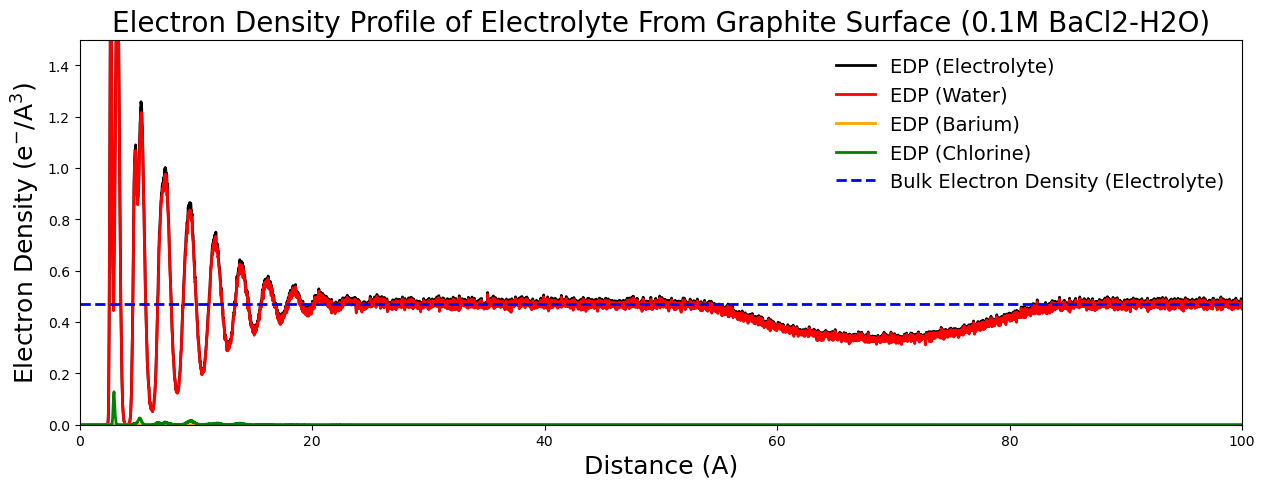

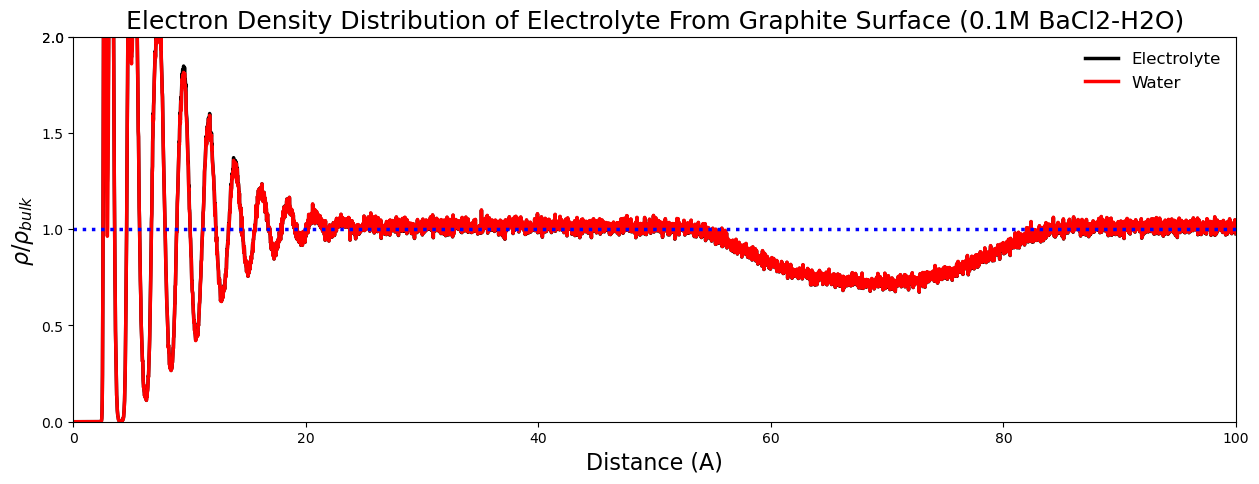

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
import numpy as np

import pandas as pd
r_sp_electrolyte, gr_sp_electrolyte = np.loadtxt("rdf-surf_grp_electrolyte_nopbc_2.xvg", comments=["@","#"], unpack=True)
r_sp_water, gr_sp_water = np.loadtxt("rdf-surf_grp_water_nopbc_2.xvg", comments=["@","#"], unpack=True)
r_sp_barium, gr_sp_barium = np.loadtxt("rdf-surf_grp_barium_nopbc_2.xvg", comments=["@","#"], unpack=True)
r_sp_chlorine, gr_sp_chlorine = np.loadtxt("rdf-surf_grp_chlorine_nopbc_2.xvg", comments=["@","#"], unpack=True)

r_sp_electrolyte = r_sp_electrolyte*10 #Angstrom
r_sp_water = r_sp_water*10 #Angstrom
r_sp_barium = r_sp_barium*10 #Angstrom
r_sp_chlorine = r_sp_chlorine*10 #Angstrom

gr_sp_arr_electrolyte = np.array(gr_sp_electrolyte)
gr_sp_arr_electrolyte_trim = np.trim_zeros(gr_sp_arr_electrolyte)
gr_sp_arr_electrolyte_trim_sum = np.sum(gr_sp_arr_electrolyte_trim)
gr_sp_arr_electrolyte_trim_avg = gr_sp_arr_electrolyte_trim_sum/gr_sp_arr_electrolyte_trim.size
scaling_factor_electrolyte = gr_sp_arr_electrolyte_trim_avg/bulk_e_dens_electrolyte
e_dens_sp_electrolyte = gr_sp_arr_electrolyte/scaling_factor_electrolyte

gr_sp_arr_water = np.array(gr_sp_water)
gr_sp_arr_water_trim = np.trim_zeros(gr_sp_arr_water)
gr_sp_arr_water_trim_sum = np.sum(gr_sp_arr_water_trim)
gr_sp_arr_water_trim_avg = gr_sp_arr_water_trim_sum/gr_sp_arr_water_trim.size
scaling_factor_water = gr_sp_arr_water_trim_avg/bulk_e_dens_water
e_dens_sp_water = gr_sp_arr_water/scaling_factor_water

gr_sp_arr_barium = np.array(gr_sp_barium)
gr_sp_arr_barium_trim = np.trim_zeros(gr_sp_arr_barium)
gr_sp_arr_barium_trim_sum = np.sum(gr_sp_arr_barium_trim)
gr_sp_arr_barium_trim_avg = gr_sp_arr_barium_trim_sum/gr_sp_arr_barium_trim.size
scaling_factor_barium = gr_sp_arr_barium_trim_avg/bulk_e_dens_barium
e_dens_sp_barium = gr_sp_arr_barium/scaling_factor_barium

gr_sp_arr_chlorine = np.array(gr_sp_chlorine)
gr_sp_arr_chlorine_trim = np.trim_zeros(gr_sp_arr_chlorine)
gr_sp_arr_chlorine_trim_sum = np.sum(gr_sp_arr_chlorine_trim)
gr_sp_arr_chlorine_trim_avg = gr_sp_arr_chlorine_trim_sum/gr_sp_arr_chlorine_trim.size
scaling_factor_chlorine = gr_sp_arr_chlorine_trim_avg/bulk_e_dens_chlorine
e_dens_sp_chlorine = gr_sp_arr_chlorine/scaling_factor_chlorine

plt.figure(figsize = (15, 5))
plt.plot(r_sp_electrolyte[:7500],e_dens_sp_electrolyte[:7500], linewidth=2, label = "EDP (Electrolyte)", color = "black")
plt.plot(r_sp_water[:7500],e_dens_sp_water[:7500], linewidth=2, label = "EDP (Water)", color = "red")
plt.plot(r_sp_barium[:7500],e_dens_sp_barium[:7500], linewidth=2, label = "EDP (Barium)", color = "orange")
plt.plot(r_sp_chlorine[:7500],e_dens_sp_chlorine[:7500], linewidth=2, label = "EDP (Chlorine)", color = "green")
plt.axhline(y = bulk_e_dens_electrolyte, color='blue', linestyle='--', linewidth=2, label = "Bulk Electron Density (Electrolyte)")
plt.xlim([0,100])
plt.ylim([0,1.5])
#plt.yticks([0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6])
plt.legend(fontsize = 14, frameon=False)
plt.xlabel('Distance (A)',fontsize = 18)
plt.ylabel('Electron Density (e$^{-}$/A$^{3}$)',fontsize = 18)
plt.title('Electron Density Profile of Electrolyte From Graphite Surface (0.1M BaCl2-H2O)',fontsize = 20)
plt.savefig("electron_density_electrolyte_bacl_0.1m_0.1epC_2.svg",bbox_inches='tight')
plt.show()

plt.figure(figsize = (15, 5))
plt.plot(r_sp_electrolyte[:7500],e_dens_sp_electrolyte[:7500]/bulk_e_dens_electrolyte, linewidth=2.5, label = "Electrolyte", color = "black")
plt.plot(r_sp_water[:7500],e_dens_sp_water[:7500]/bulk_e_dens_water, linewidth=2.5, label = "Water", color = "red")
#plt.plot(r_sp_barium[:7500],e_dens_sp_barium[:7500]/bulk_e_dens_barium, linewidth=2.5, label = "barium", color = "orange")
#plt.plot(r_sp_chlorine[:7500],e_dens_sp_chlorine[:7500]/bulk_e_dens_chlorine, linewidth=2.5, label = "Chlorine", color = "green")
plt.axhline(y = 1.0, color='blue', linestyle='dotted', linewidth=2.5)
plt.xlim([0,100])
plt.ylim([0,2])
plt.yticks([0,0.5,1,1.5,2,2])
plt.legend(fontsize = 12, loc = 'upper right', frameon=False)
plt.xlabel('Distance (A)',fontsize = 16)
plt.ylabel(r"$\rho$"+"/"+r"$\rho$$_{bulk}$",fontsize = 16)
plt.title('Electron Density Distribution of Electrolyte From Graphite Surface (0.1M BaCl2-H2O)',fontsize = 18)
plt.savefig("electron_density_electrolyte_ratio_bacl_0.1m_0.1epC_2.svg",bbox_inches='tight')
plt.show()

df = pd.DataFrame({"r":r_sp_electrolyte[:7500],"Electrolyte - Electron Density (e$^{-}$/A$^{3}$)":e_dens_sp_electrolyte[:7500],"Water - Electron Density (e$^{-}$/A$^{3}$)":e_dens_sp_water[:7500],"Barium - Electron Density (e$^{-}$/A$^{3}$)":e_dens_sp_barium[:7500],"Chlorine - Electron Density (e$^{-}$/A$^{3}$)":e_dens_sp_chlorine[:7500]})
df.to_csv("electron_density_0.1m_0.1epC_2.csv", index=False)

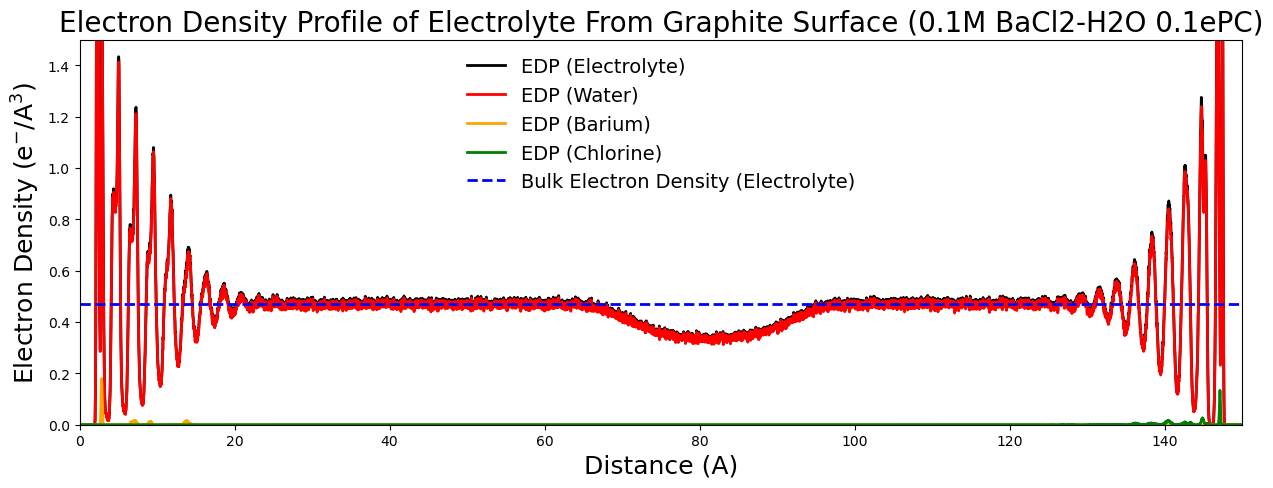

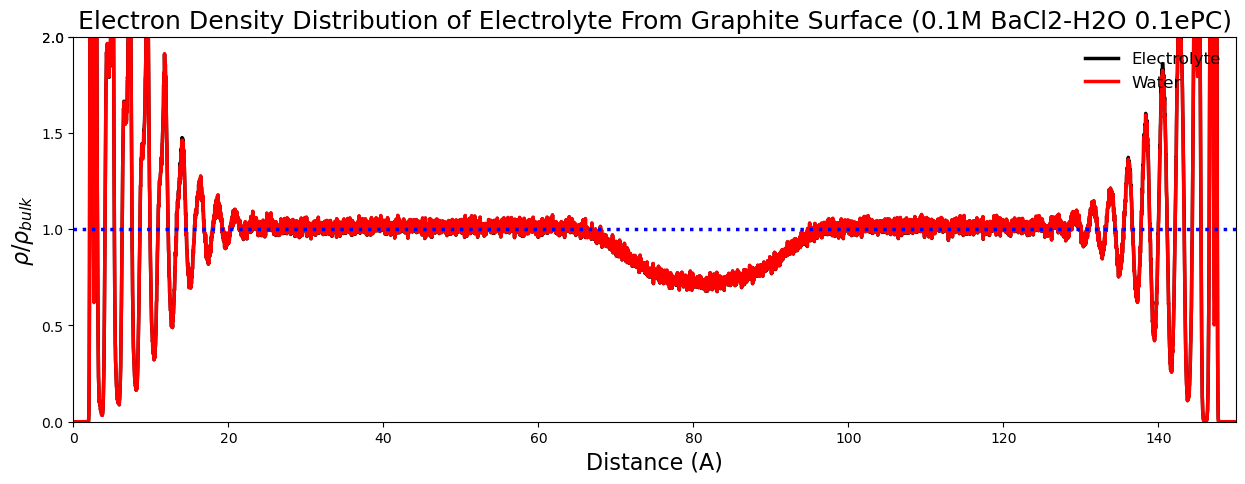

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
import numpy as np
import pandas as pd

r_sp_electrolyte, gr_sp_electrolyte = np.loadtxt("rdf-surf_grp_electrolyte_nopbc.xvg", comments=["@","#"], unpack=True)
r_sp_water, gr_sp_water = np.loadtxt("rdf-surf_grp_water_nopbc.xvg", comments=["@","#"], unpack=True)
r_sp_barium, gr_sp_barium = np.loadtxt("rdf-surf_grp_barium_nopbc.xvg", comments=["@","#"], unpack=True)
r_sp_chlorine, gr_sp_chlorine = np.loadtxt("rdf-surf_grp_chlorine_nopbc.xvg", comments=["@","#"], unpack=True)

r_sp_electrolyte = r_sp_electrolyte*10 #Angstrom
r_sp_water = r_sp_water*10 #Angstrom
r_sp_barium = r_sp_barium*10 #Angstrom
r_sp_chlorine = r_sp_chlorine*10 #Angstrom

gr_sp_arr_electrolyte = np.array(gr_sp_electrolyte)
gr_sp_arr_electrolyte_trim = np.trim_zeros(gr_sp_arr_electrolyte)
gr_sp_arr_electrolyte_trim_sum = np.sum(gr_sp_arr_electrolyte_trim)
gr_sp_arr_electrolyte_trim_avg = gr_sp_arr_electrolyte_trim_sum/gr_sp_arr_electrolyte_trim.size
scaling_factor_electrolyte = gr_sp_arr_electrolyte_trim_avg/bulk_e_dens_electrolyte
e_dens_sp_electrolyte = gr_sp_arr_electrolyte/scaling_factor_electrolyte

gr_sp_arr_water = np.array(gr_sp_water)
gr_sp_arr_water_trim = np.trim_zeros(gr_sp_arr_water)
gr_sp_arr_water_trim_sum = np.sum(gr_sp_arr_water_trim)
gr_sp_arr_water_trim_avg = gr_sp_arr_water_trim_sum/gr_sp_arr_water_trim.size
scaling_factor_water = gr_sp_arr_water_trim_avg/bulk_e_dens_water
e_dens_sp_water = gr_sp_arr_water/scaling_factor_water

gr_sp_arr_barium = np.array(gr_sp_barium)
gr_sp_arr_barium_trim = np.trim_zeros(gr_sp_arr_barium)
gr_sp_arr_barium_trim_sum = np.sum(gr_sp_arr_barium_trim)
gr_sp_arr_barium_trim_avg = gr_sp_arr_barium_trim_sum/gr_sp_arr_barium_trim.size
scaling_factor_barium = gr_sp_arr_barium_trim_avg/bulk_e_dens_barium
e_dens_sp_barium = gr_sp_arr_barium/scaling_factor_barium

gr_sp_arr_chlorine = np.array(gr_sp_chlorine)
gr_sp_arr_chlorine_trim = np.trim_zeros(gr_sp_arr_chlorine)
gr_sp_arr_chlorine_trim_sum = np.sum(gr_sp_arr_chlorine_trim)
gr_sp_arr_chlorine_trim_avg = gr_sp_arr_chlorine_trim_sum/gr_sp_arr_chlorine_trim.size
scaling_factor_chlorine = gr_sp_arr_chlorine_trim_avg/bulk_e_dens_chlorine
e_dens_sp_chlorine = gr_sp_arr_chlorine/scaling_factor_chlorine

plt.figure(figsize = (15, 5))
plt.plot(r_sp_electrolyte[:],e_dens_sp_electrolyte[:], linewidth=2, label = "EDP (Electrolyte)", color = "black")
plt.plot(r_sp_water[:],e_dens_sp_water[:], linewidth=2, label = "EDP (Water)", color = "red")
plt.plot(r_sp_barium[:],e_dens_sp_barium[:], linewidth=2, label = "EDP (Barium)", color = "orange")
plt.plot(r_sp_chlorine[:],e_dens_sp_chlorine[:], linewidth=2, label = "EDP (Chlorine)", color = "green")
plt.axhline(y = bulk_e_dens_electrolyte, color='blue', linestyle='--', linewidth=2, label = "Bulk Electron Density (Electrolyte)")
plt.xlim([0,150])
plt.ylim([0,1.5])
#plt.yticks([0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6])
plt.legend(fontsize = 14, frameon=False)
plt.xlabel('Distance (A)',fontsize = 18)
plt.ylabel('Electron Density (e$^{-}$/A$^{3}$)',fontsize = 18)
plt.title('Electron Density Profile of Electrolyte From Graphite Surface (0.1M BaCl2-H2O 0.1ePC)',fontsize = 20)
plt.savefig("electron_density_electrolyte_bacl_0.1m_0.1epC_full.svg",bbox_inches='tight')
plt.show()

plt.figure(figsize = (15, 5))
plt.plot(r_sp_electrolyte[:],e_dens_sp_electrolyte[:]/bulk_e_dens_electrolyte, linewidth=2.5, label = "Electrolyte", color = "black")
plt.plot(r_sp_water[:],e_dens_sp_water[:]/bulk_e_dens_water, linewidth=2.5, label = "Water", color = "red")
#plt.plot(r_sp_barium[:],e_dens_sp_barium[:]/bulk_e_dens_barium, linewidth=2.5, label = "barium", color = "orange")
#plt.plot(r_sp_chlorine[:],e_dens_sp_chlorine[:]/bulk_e_dens_chlorine, linewidth=2.5, label = "Chlorine", color = "green")
plt.axhline(y = 1.0, color='blue', linestyle='dotted', linewidth=2.5)
plt.xlim([0,150])
plt.ylim([0,2])
plt.yticks([0,0.5,1,1.5,2,2])
plt.legend(fontsize = 12, loc = 'upper right', frameon=False)
plt.xlabel('Distance (A)',fontsize = 16)
plt.ylabel(r"$\rho$"+"/"+r"$\rho$$_{bulk}$",fontsize = 16)
plt.title('Electron Density Distribution of Electrolyte From Graphite Surface (0.1M BaCl2-H2O 0.1ePC)',fontsize = 18)
plt.savefig("electron_density_electrolyte_ratio_bacl_0.1m_0.1epC_full.svg",bbox_inches='tight')
plt.show()

df = pd.DataFrame({"r":r_sp_electrolyte[:],"Electrolyte - Electron Density (e$^{-}$/A$^{3}$)":e_dens_sp_electrolyte[:],"Water - Electron Density (e$^{-}$/A$^{3}$)":e_dens_sp_water[:],"Barium - Electron Density (e$^{-}$/A$^{3}$)":e_dens_sp_barium[:],"Chlorine - Electron Density (e$^{-}$/A$^{3}$)":e_dens_sp_chlorine[:]})
df.to_csv("electron_density_0.1m_0.1epC_full.csv", index=False)